### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



,Tienda,Facturación Total
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"


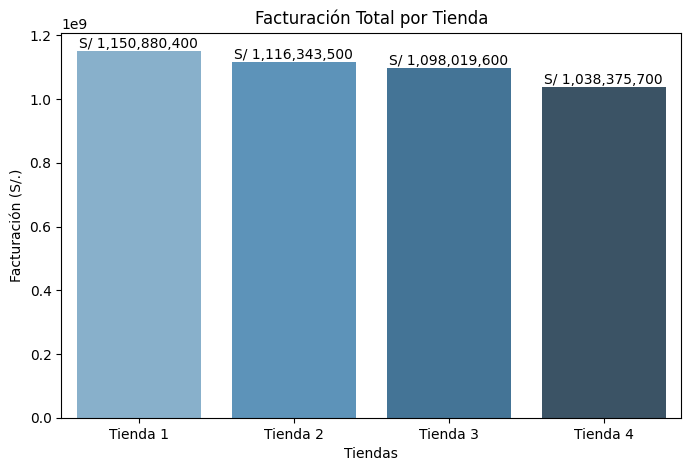

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Diccionario con sumatoria de facturación por tienda
facturacion = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

# Convertir a DataFrame
facturacion_df = pd.DataFrame(list(facturacion.items()), columns=["Tienda", "Facturación Total"])

# Mostrar tabla con formato más legible
pd.options.display.float_format = '{:,.2f}'.format
display(facturacion_df)

# --- Gráfico ---
plt.figure(figsize=(8,5))
sns.barplot(data=facturacion_df, x="Tienda", y="Facturación Total", hue="Tienda",
            palette="Blues_d", legend=False)

plt.title("Facturación Total por Tienda")
plt.ylabel("Facturación (S/.)")
plt.xlabel("Tiendas")

# Mostrar valores encima de las barras
for index, value in enumerate(facturacion_df["Facturación Total"]):
    plt.text(index, value, f"S/ {value:,.0f}", ha='center', va='bottom')

plt.show()


# 2. Ventas por categoría

📊 Resumen de categorías - Tienda 1


,Cantidad Vendida,Facturación
Categoría del Producto,,
Muebles,465,187633700.0
Electrónicos,448,429493500.0
Juguetes,324,17995700.0
Electrodomésticos,312,363685200.0
Deportes y diversión,284,39290000.0
Instrumentos musicales,182,91299000.0
Libros,173,8784900.0
Artículos para el hogar,171,12698400.0


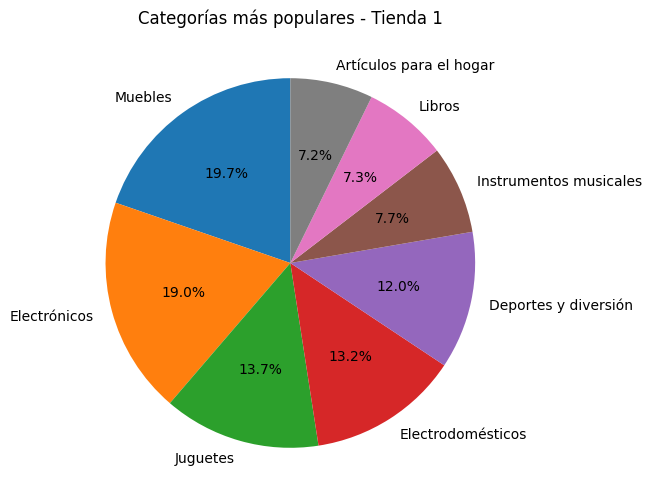

📊 Resumen de categorías - Tienda 2


,Cantidad Vendida,Facturación
Categoría del Producto,,
Muebles,442,176426300.0
Electrónicos,422,410831100.0
Juguetes,313,15945400.0
Electrodomésticos,305,348567800.0
Deportes y diversión,275,34744500.0
Instrumentos musicales,224,104990300.0
Libros,197,10091200.0
Artículos para el hogar,181,14746900.0


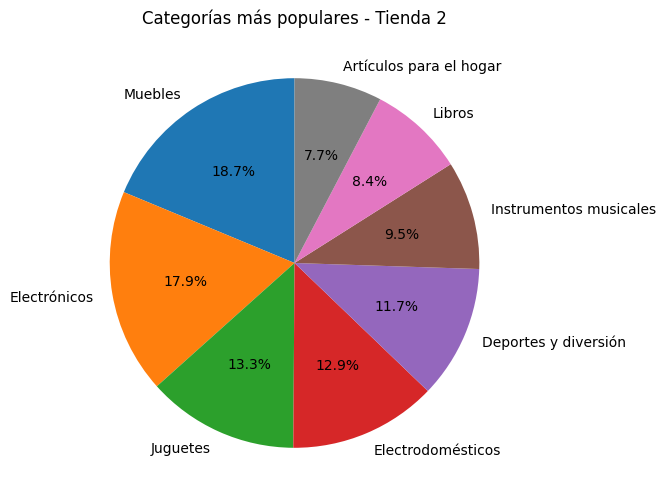

📊 Resumen de categorías - Tienda 3


,Cantidad Vendida,Facturación
Categoría del Producto,,
Muebles,499,201072100.0
Electrónicos,451,410775800.0
Juguetes,315,19401100.0
Electrodomésticos,278,329237900.0
Deportes y diversión,277,35593100.0
Libros,185,9498700.0
Artículos para el hogar,177,15060000.0
Instrumentos musicales,177,77380900.0


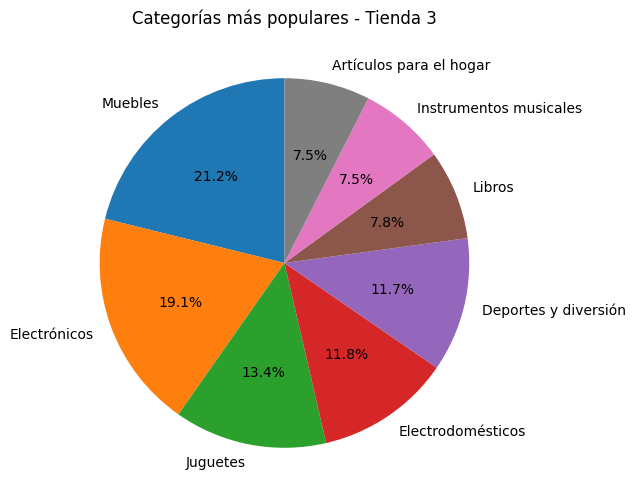

📊 Resumen de categorías - Tienda 4


,Cantidad Vendida,Facturación
Categoría del Producto,,
Muebles,480,192528900.0
Electrónicos,451,409476100.0
Juguetes,338,20262200.0
Deportes y diversión,277,33350100.0
Electrodomésticos,254,283260200.0
Artículos para el hogar,201,15074500.0
Libros,187,9321300.0
Instrumentos musicales,170,75102400.0


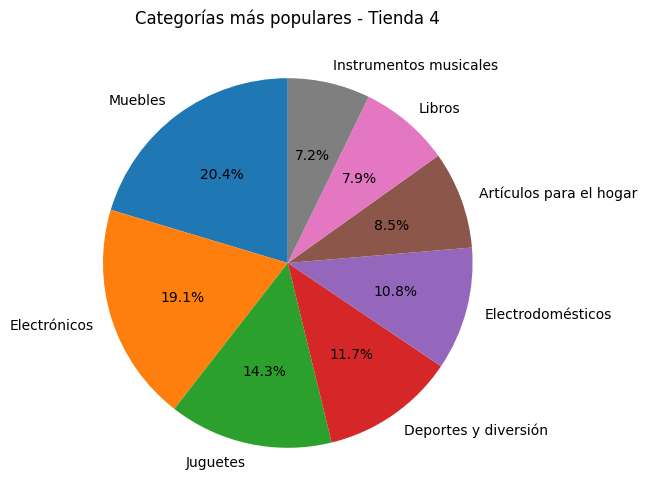

In [6]:
import matplotlib.pyplot as plt

# --- Cantidad de productos vendidos y facturación por categoría en cada tienda ---
def ventas_por_categoria(df, nombre_tienda):
    # Agrupar por categoría: cantidad de productos y facturación
    resumen = df.groupby("Categoría del Producto").agg({
        "Producto": "count",   # Cantidad de ventas
        "Precio": "sum"        # Facturación total
    }).rename(columns={"Producto": "Cantidad Vendida", "Precio": "Facturación"})

    resumen = resumen.sort_values("Cantidad Vendida", ascending=False)

    print(f"📊 Resumen de categorías - {nombre_tienda}")
    display(resumen)

    # --- Visualización (solo cantidad vendida, no cambia) ---
    conteo = df["Categoría del Producto"].value_counts()

    plt.figure(figsize=(6,6))
    plt.pie(conteo, labels=conteo.index, autopct="%1.1f%%", startangle=90)
    plt.title(f"Categorías más populares - {nombre_tienda}")
    plt.show()

# Ejecutar para cada tienda
ventas_por_categoria(tienda, "Tienda 1")
ventas_por_categoria(tienda2, "Tienda 2")
ventas_por_categoria(tienda3, "Tienda 3")
ventas_por_categoria(tienda4, "Tienda 4")



# 3. Calificación promedio de la tienda


⭐ Calificación Promedio


,Promedio Calificación
Tienda 1,3.98
Tienda 2,4.04
Tienda 3,4.05
Tienda 4,4.00


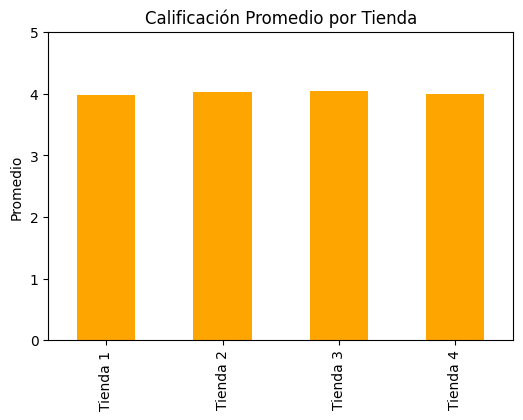

In [11]:
calificacion = pd.DataFrame({
    "Tienda 1": [tienda["Calificación"].mean()],
    "Tienda 2": [tienda2["Calificación"].mean()],
    "Tienda 3": [tienda3["Calificación"].mean()],
    "Tienda 4": [tienda4["Calificación"].mean()]
}).T
calificacion.columns = ["Promedio Calificación"]

print("⭐ Calificación Promedio")
display(calificacion)

# Gráfico
calificacion.plot(kind="bar", legend=False, figsize=(6,4), color="orange")
plt.title("Calificación Promedio por Tienda")
plt.ylim(0, 5)
plt.ylabel("Promedio")
plt.show()


# 4. Productos más y menos vendidos

📊 Productos más y menos vendidos con facturación y costo de envío


,Tienda,Más vendido,Ventas (más),Facturación (más),Costo envío prom. (más),Menos vendido,Ventas (menos),Facturación (menos),Costo envío prom. (menos)
0,Tienda 1,Armario,60,29462300.0,26068.333333,Auriculares con micrófono,33,4730800.0,8221.212121
1,Tienda 2,Iniciando en programación,65,3127800.0,2500.000000,Juego de mesa,32,5811900.0,9571.875000
2,Tienda 3,Kit de bancas,57,16699800.0,15784.210526,Bloques de construcción,35,1237200.0,1460.000000
3,Tienda 4,Cama box,62,32946300.0,28253.225806,Guitarra eléctrica,33,25823100.0,40954.545455


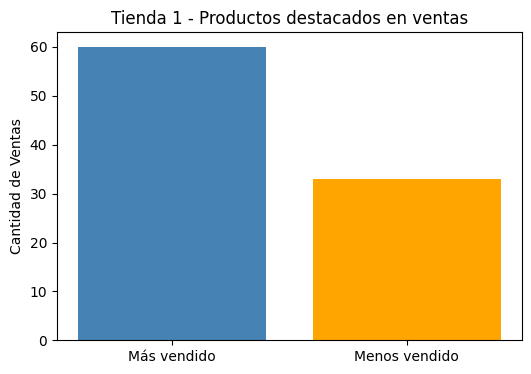

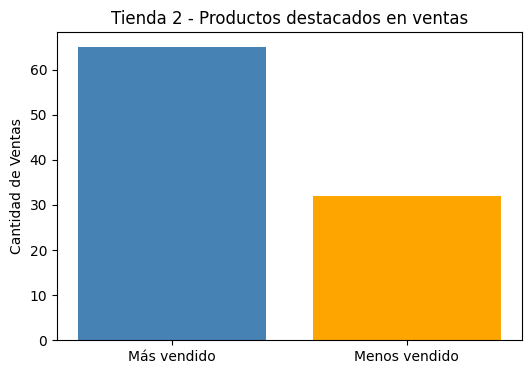

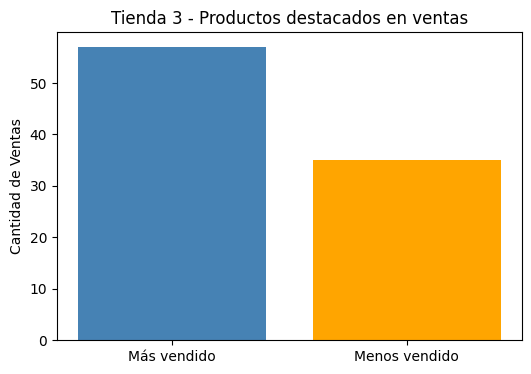

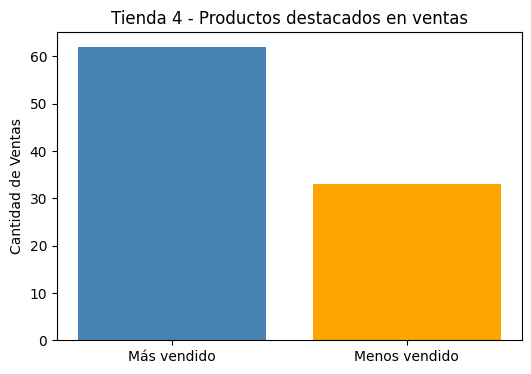

In [4]:
#4. Función para obtener productos más y menos vendidos
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Comprobar
tienda.head()


def productos_extremos(df, tienda_nombre):
    # Agrupar por producto y calcular ventas, facturación y costo de envío
    resumen = df.groupby("Producto").agg({
        "Precio": "sum",          # Facturación total del producto
        "Costo de envío": "mean", # Costo promedio de envío del producto
        "Producto": "count"       # Cantidad vendida
    }).rename(columns={"Producto": "Cantidad Vendida"})

    # Identificar más y menos vendido
    mas_vendido = resumen["Cantidad Vendida"].idxmax()
    menos_vendido = resumen["Cantidad Vendida"].idxmin()

    return {
        "Tienda": tienda_nombre,
        "Más vendido": mas_vendido,
        "Ventas (más)": resumen.loc[mas_vendido, "Cantidad Vendida"],
        "Facturación (más)": resumen.loc[mas_vendido, "Precio"],
        "Costo envío prom. (más)": resumen.loc[mas_vendido, "Costo de envío"],

        "Menos vendido": menos_vendido,
        "Ventas (menos)": resumen.loc[menos_vendido, "Cantidad Vendida"],
        "Facturación (menos)": resumen.loc[menos_vendido, "Precio"],
        "Costo envío prom. (menos)": resumen.loc[menos_vendido, "Costo de envío"]
    }

# Crear tabla resumen para todas las tiendas
productos_info = [
    productos_extremos(tienda, "Tienda 1"),
    productos_extremos(tienda2, "Tienda 2"),
    productos_extremos(tienda3, "Tienda 3"),
    productos_extremos(tienda4, "Tienda 4"),
]
productos_df = pd.DataFrame(productos_info)

print("📊 Productos más y menos vendidos con facturación y costo de envío")
display(productos_df)

# Visualización simple
for idx, row in productos_df.iterrows():
    plt.figure(figsize=(6,4))
    productos = ["Más vendido", "Menos vendido"]
    ventas = [row["Ventas (más)"], row["Ventas (menos)"]]
    colores = ["steelblue", "orange"]

    plt.bar(productos, ventas, color=colores)
    plt.title(f"{row['Tienda']} - Productos destacados en ventas")
    plt.ylabel("Cantidad de Ventas")
    plt.show()



# 5. Envío promedio por tienda

🚚 Costo Promedio de Envío


,Costo Promedio Envío
Tienda 1,"26,018.61"
Tienda 2,"25,216.24"
Tienda 3,"24,805.68"
Tienda 4,"23,459.46"


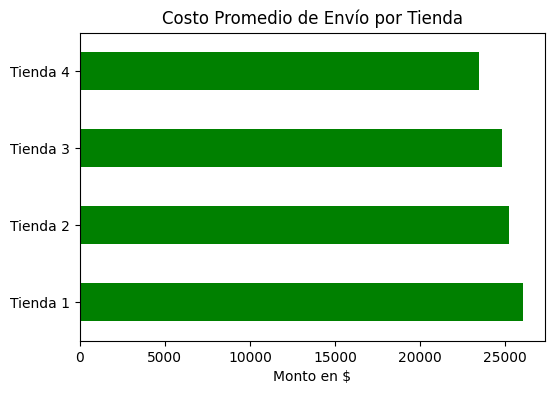

In [18]:
envio = pd.DataFrame({
    "Tienda 1": [tienda["Costo de envío"].mean()],
    "Tienda 2": [tienda2["Costo de envío"].mean()],
    "Tienda 3": [tienda3["Costo de envío"].mean()],
    "Tienda 4": [tienda4["Costo de envío"].mean()]
}).T
envio.columns = ["Costo Promedio Envío"]

print("🚚 Costo Promedio de Envío")
display(envio)

# Gráfico
envio.plot(kind="barh", legend=False, figsize=(6,4), color="green")
plt.title("Costo Promedio de Envío por Tienda")
plt.xlabel("Monto en $")
plt.show()

# INFORME DE CHALLENGE
1. Introducción
En este análisis se evaluaron cuatro tiendas con el fin de determinar cuál es la más conveniente para que el Sr. Juan venda sus productos. El objetivo principal fue comparar el desempeño de cada tienda considerando factores como ingresos totales, categorías de productos más y menos vendidos, calificaciones promedio de clientes, productos destacados y coste de envío. Con base en estos indicadores y las visualizaciones generadas, se realizará una recomendación final. El propósito final es determinar qué tienda genera menos beneficios y debería ser considerada para su venta.

2. Desarrollo del análisis
2.1 Ingresos Totales

Tienda 1: 1,150,880,400.00

Tienda 2: 1,116,343,500.00

Tienda 3: 1,098,019,600.00

Tienda 4: 1,038,375,700.00


2.2 Categorías de Productos Más y Menos Vendidas

Tienda 1: categoría más vendida → Muebles ; menos vendida → Articulos para el hogar.

Tienda 2: categoría más vendida → Muebles ; menos vendida → Articulos para el hogar.

Tienda 3: categoría más vendida → Muebles ; menos vendida → Instrumentos musicales.

Tienda 4: categoría más vendida → Muebles ; menos vendida → Instrumentos Musicales.

2.3 Calificaciones Promedio de Clientes

Tienda 1: 3.98 ⭐

Tienda 2: 4.04 ⭐

Tienda 3: 4.05 ⭐

Tienda 4: 4.00 ⭐


2.4 Productos Más y Menos Vendidos

Tienda 1: más vendido → Microondas ; menos vendido → Auriculares con microfono.

Tienda 2: más vendido → Iniciando en programacion ; menos vendido → Juego de Mesa.

Tienda 3: más vendido → Kit de Bancas ; menos vendido → Bloques de Construccion.

Tienda 4: más vendido → Cama box ; menos vendido → Guitarra Electrica.


2.5 Costo de Envío Promedio

Tienda 1: 26 018.61

Tienda 2: 25 216.24

Tienda 3: 24 805.68

Tienda 4: 23 459.46


3. Conclusión y Recomendación

Del análisis realizado se concluye lo siguiente:

La tienda con mayor facturación es tienda 1, lo que indica un mejor desempeño económico.

En términos de categorías de productos, tienda 1 presenta mayor diversidad/ventas, ya que sus proporción es más pareja.

Sim embargo, analizando las categorías más vendidas, los electrodomésticos, aunque no son los más vendidos, son lo que más facturación generan.

La satisfacción del cliente fue más alta en tienda 3 con una calificación promedio de 4.05, y la tienda 4 tienda 1 tiene la menor calificación.

El costo de envío más bajo se encontró en tienda 4, lo que representa una ventaja competitiva, sin embargo esto va acorde a la facturación que tiene.

La tienda 1 es la que mayor facturación tiene, mayor equilibrio en las ventas por categoría, también una ganancia sólida en los productos más vendidos, aunque debe mejorar su servicio al cliente debido a que tiene la calificación más baja, y los costos de envio son proporciales al número de pedidos que tienen.

La tienda 2, de forma similar tiene la segunda mayor facturación,tiene un buen equilibrio en las ventas por categoría, también una facturación sólida en los productos más vendidos, también tiene una buena calificación en su servicio al cliente y los costos de envio son proporciales al número de pedidos que tienen.

La tienda 3 de forma similar tiene la tercera mayor facturación,tiene un buen equilibrio en las ventas por categoría, también una facturación sólida en los productos más vendidos, también tiene una buena calificación en su servicio al cliente y los costos de envio son proporciales al número de pedidos que tienen.

La tienda 4 tiene la menor facturación,tiene un buen equilibrio en las ventas por categoría aunque un poco más desbalanceado sobre todo el categoría electrodomésticos (significativamente menor), también una facturación significativa en su producto más vendidos, también tiene la segunda calificación más baja en su servicio al cliente y los costos de envio son proporciales al número de pedidos que tienen.

➡️ Recomendación: El Sr. Juan debería vender la Tienda 4, ya que presenta la facturación más baja y menor rendimiento general en comparación con las otras tiendas.